# Customer Subscriptions Analysis


## Introduction

* __Purpose:__ The purpose of this porject is to analyze customer subscritions data, focusing on identifying key sales trends, evaluating retention rates, examining product performance across different product plans and product periods and customer types. To enable a more comprehensive analysis, the dataset was expanded to include additional elements using randomization for the values, introducing greater complexity. This project aims to provide the company with actionable insights into customer behavior to optimize its product offerings, strengthen customer engagement through loyalty programs, and refine marketing strategies for sustained growth. 




* __Dataset Overview:__ 

    * This project uses four primary datasets:
    1. <mark>customer_info.csv</mark> This dataset captures demographic information about customers to analyze trends by age and gender. It is used to assess customer segmentation, preferences, and their potential influence on subscription behaviors.
    2. <mark>customer_product.csv</mark> This dataset tracks customers' subscription activities, including the product type and their subscription/cancellation dates. It is used to analyze subscription patterns, customer retention, and cancellation trends over time.
    3. <mark>customer_cases.csv</mark> This dataset logs customer interactions, detailing the communication channel and the reason for contact. It is used to analyze customer touchpoints, understand the primary reasons for engagement (e.g., signup, support), and improve service delivery strategies.
    4. <mark>product_info.csv</mark> This dataset provides details about available products, including pricing and subscription types (monthly or annual). It is used to understand product offerings, their pricing impact, and customer preferences for billing cycles.
    <br> 
    <br> 
    

These datasets together allow for a comprehensive view of sales performance and customer behavior trends.
***


## Data Loading
Load and examine the initial structure of the datasets required for this analysis.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Style and format preferences
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8) 
# Apply the Seaborn style
sns.set(style="white")

* __Demographic Information Data:__ Load <mark>customer_info.csv</mark> 

* __Support Interactions Data:__ Load <mark>customer_cases.csv</mark> 

* __Subscription History Data__: Load <mark>customer_product.csv</mark> 

* __Product Details Data__: Load <mark>product_info.csv</mark> 

In [3]:
# load data without duplicate index column
customer_info = pd.read_csv('Data10/customer_info.csv', index_col=0)
customer_prod = pd.read_csv('Data10/customer_product.csv', index_col=0)
customer_case = pd.read_csv('Data10/customer_cases.csv',index_col=0)
prod_info = pd.read_csv('Data10/product_info.csv')

Display the first few rows of each dataset to confirm successful loading and inspect initial data structure.

In [4]:
customer_info.head(10)

,customer_id,age,gender
1,C2448,76,female
2,C2449,61,male
3,C2450,58,female
4,C2451,62,female
5,C2452,71,male
6,C2453,56,male
7,C2454,53,male
8,C2455,53,female
9,C2456,70,female
10,C2457,68,male


In [5]:
customer_prod.head(10)

,customer_id,product,signup_date_time,cancel_date_time
1,C2448,prd_1,2017-01-01 10:35:09,NaN
2,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
3,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
4,C2451,prd_2,2017-01-01 13:32:08,NaN
5,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01
6,C2453,prd_1,2017-01-01 15:26:14,NaN
7,C2454,prd_1,2017-01-01 15:35:03,2021-06-01 17:09:40
8,C2455,prd_1,2017-01-02 09:01:31,NaN
9,C2456,prd_1,2017-01-02 09:21:04,2017-06-08 15:57:45
10,C2457,prd_1,2017-01-02 09:26:42,2017-11-25 12:55:05


In [6]:
customer_case.head()

,case_id,date_time,customer_id,channel,reason
1,CC101,2017-01-01 10:32:03,C2448,phone,signup
2,CC102,2017-01-01 11:35:47,C2449,phone,signup
3,CC103,2017-01-01 11:37:09,C2450,phone,signup
4,CC104,2017-01-01 13:28:14,C2451,phone,signup
5,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [7]:
prod_info.head()

,product_id,name,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1


***
## Data Cleaning
Data cleaning is essential to prepare the datasets for analysis. This section focuses on ensuring consistency, handling missing values, and standardizing formats across the data.

### Standardize and Inspect
Standardize column names for easier access and inspect data structure.

In [8]:
# CUSTOMER_INFO DATASET

customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508932 entries, 1 to 508932
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  508932 non-null  object
 1   age          508932 non-null  int64 
 2   gender       508932 non-null  object
dtypes: int64(1), object(2)
memory usage: 15.5+ MB


In [9]:
# CUSTOMER_PROD DATASET

customer_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508932 entries, 1 to 508932
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   customer_id       508932 non-null  object
 1   product           508932 non-null  object
 2   signup_date_time  508932 non-null  object
 3   cancel_date_time  112485 non-null  object
dtypes: object(4)
memory usage: 19.4+ MB


In [10]:
# shorten column names
customer_prod.rename(columns={"signup_date_time": "signup_date","cancel_date_time": "cancel_date"}, inplace= True)
customer_prod.columns

Index(['customer_id', 'product', 'signup_date', 'cancel_date'], dtype='object')

In [11]:
# CUSTOMER_CASE DATASET

customer_case.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330512 entries, 1 to 330512
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   case_id      330512 non-null  object
 1   date_time    330512 non-null  object
 2   customer_id  330512 non-null  object
 3   channel      330512 non-null  object
 4   reason       330512 non-null  object
dtypes: object(5)
memory usage: 15.1+ MB


In [12]:
# shorten column names
customer_case.rename(columns={"date_time": "date"}, inplace= True)
customer_case.columns

Index(['case_id', 'date', 'customer_id', 'channel', 'reason'], dtype='object')

In [13]:
# PROD_INFO DATASET

prod_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     2 non-null      object
 1   name           2 non-null      object
 2   price          2 non-null      int64 
 3   billing_cycle  2 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 192.0+ bytes


### Data Type Corrections

Ensure accurate data types, particularly for date columns.

1. __Product Name Standardization__: Clean up all date entries to standardize object type to datetime object and remove timestamp from date columns, eg. replacing date of 2017-01-01 10:35:09 with “2017-01-01”.

In [14]:
# standardize to datetime object
customer_prod["signup_date"] = customer_prod["signup_date"].astype("datetime64").dt.normalize()
customer_prod["cancel_date"] = customer_prod["cancel_date"].astype("datetime64").dt.normalize()
customer_prod

,customer_id,product,signup_date,cancel_date
1,C2448,prd_1,2017-01-01,NaT
2,C2449,prd_1,2017-01-01,2021-09-05
3,C2450,prd_1,2017-01-01,2019-01-13
4,C2451,prd_2,2017-01-01,NaT
5,C2452,prd_1,2017-01-01,2021-06-28
...,...,...,...,...
508928,C511375,prd_2,2021-12-31,NaT
508929,C511376,prd_2,2021-12-31,NaT
508930,C511377,prd_2,2021-12-31,NaT
508931,C511378,prd_2,2021-12-31,NaT


In [15]:
# standardize to datetime object
customer_case["date"] = customer_case["date"].astype("datetime64").dt.normalize()
customer_case

,case_id,date,customer_id,channel,reason
1,CC101,2017-01-01,C2448,phone,signup
2,CC102,2017-01-01,C2449,phone,signup
3,CC103,2017-01-01,C2450,phone,signup
4,CC104,2017-01-01,C2451,phone,signup
5,CC105,2017-01-01,C2452,phone,signup
...,...,...,...,...,...
330508,CC330608,2021-12-31,C173079,email,support
330509,CC330609,2021-12-31,C497581,email,support
330510,CC330610,2021-12-31,C127630,email,support
330511,CC330611,2021-12-31,C497538,email,support


2. __Date Format Consistency:__ Verify the minimum and maximum dates and age for each date column (e.g.
    start_date, cancel_date) to detect any parsing issues.

In [16]:
customer_info[["age"]].agg(["min", "max"])

,age
min,21
max,78


In [17]:
customer_prod[["signup_date", "cancel_date"]].agg(["min", "max"],errors="coerce")

,signup_date,cancel_date
min,2017-01-01,2017-01-08
max,2021-12-31,2021-12-31


In [18]:
customer_prod["signup_date"].isnull().sum()

0

In [19]:
customer_prod["cancel_date"].isnull().sum()

# This will be corrected in the Handling Missing Data section.

396447

In [20]:
customer_case[["date"]].agg(["min", "max"])

,date
min,2017-01-01
max,2022-01-01


In [21]:
customer_case["date"].isnull().sum()

0

### Handling Missing Data
Identify and address missing data to improve data quality.



1. Impute Missing Dates: Assign a placeholder date to ongoing subscriptions. 

In [22]:
# create a new column to flag ongoing cases
customer_prod['ongoing_case'] = customer_prod['cancel_date'].isna()

# set ongoing cases using placeholder date 
customer_prod["cancel_date"].fillna(pd.Timestamp(2022,1,31), inplace=True)
customer_prod.head(10)

,customer_id,product,signup_date,cancel_date,ongoing_case
1,C2448,prd_1,2017-01-01,2022-01-31,True
2,C2449,prd_1,2017-01-01,2021-09-05,False
3,C2450,prd_1,2017-01-01,2019-01-13,False
4,C2451,prd_2,2017-01-01,2022-01-31,True
5,C2452,prd_1,2017-01-01,2021-06-28,False
6,C2453,prd_1,2017-01-01,2022-01-31,True
7,C2454,prd_1,2017-01-01,2021-06-01,False
8,C2455,prd_1,2017-01-02,2022-01-31,True
9,C2456,prd_1,2017-01-02,2017-06-08,False
10,C2457,prd_1,2017-01-02,2017-11-25,False


2. Remove Duplicates: Check for duplicate entries and remove if needed.

In [23]:
# check for duplicates 
customer_case["customer_id"].duplicated().sum()

71852

further inspect this finding to determine if duplication deletion is necessary 

In [24]:
# inspect duplicated data
customer_case[customer_case.duplicated(["reason", "customer_id"], keep=False)].sort_values(by=['customer_id'])

,case_id,date,customer_id,channel,reason
281599,CC281699,2021-08-24,C100020,email,support
241966,CC242066,2021-05-22,C100020,email,support
250042,CC250142,2021-06-11,C100021,phone,support
306963,CC307063,2021-10-25,C100021,phone,support
228062,CC228162,2021-04-17,C100033,phone,support
...,...,...,...,...,...
243376,CC243476,2021-05-26,C99984,phone,support
281201,CC281301,2021-08-23,C99993,email,support
248993,CC249093,2021-06-09,C99993,phone,support
247751,CC247851,2021-06-06,C99997,phone,support


In [25]:
# check if customers who choose to signup with the support team have duplicates
customer_case[ customer_case["reason"] == "signup" ].duplicated(subset=["customer_id"]).sum()

0

__Note__ Duplicates in the "support" reason reflect repeated interactions or follow-ups, which is expected in customer service data. These duplicates likely represent repeated interactions and/or follow-up cases from the same customer across different dates or reason. The "signup" reason has no duplicates, confirming this pattern. Since this aligns with real-world behavior, duplicate deletion is unnecessary.

## Data Creation -Expanding the Dataset

__Purpose:__ In this section, I will expand the dataset by introducing two additional subscription plans, each offering both annual and monthly sign-up options, depending on the customer's choice. This expansion is designed to simulate a more diverse and realistic subscription-based business environment, where multiple plans cater to different customer needs and preferences. Adding these plans enhances the complexity of the dataset, providing a broader scope for analysis and allowing us to better understand customer behavior across various product tiers. This addition also supports more robust modeling and trend analysis, making the insights generated from this project more applicable to real-world scenarios.

__Currently, there is only one subscription plan. This will be referred to as the "business" subscriptions. I will create Basic and Enterprise subscriptions, each with monthly and annual plans__

__a. Rename product subscription plan and create columns for period type and price for easier filtering__

In [26]:
# mapping variables
business_map = {
    "prd_1": {"subscription_period": "annual", "price": 1200, "product": "business"},
    "prd_2": {"subscription_period": "monthly", "price": 125, "product": "business"} }

# rename product values and add relavent plan period and price column
customer_prod = customer_prod.assign(
    subscription_period=customer_prod["product"].map(lambda x: business_map[x]["subscription_period"]),
    price=customer_prod["product"].map(lambda x: business_map[x]["price"]),
    product=customer_prod["product"].map(lambda x: business_map[x]["product"]) )

customer_prod.head()

,customer_id,product,signup_date,cancel_date,ongoing_case,subscription_period,price
1,C2448,business,2017-01-01,2022-01-31,True,annual,1200
2,C2449,business,2017-01-01,2021-09-05,False,annual,1200
3,C2450,business,2017-01-01,2019-01-13,False,annual,1200
4,C2451,business,2017-01-01,2022-01-31,True,monthly,125
5,C2452,business,2017-01-01,2021-06-28,False,annual,1200


__b. Create Basic annual subsciption data__

In [27]:
# variables needed for the Basic subscriptions data

# amount of basic annual subscriptions
basic_annual_amount = 450000

# obtain range of possible dates
date_range = pd.date_range(start="2017-02-01", end="2021-12-02", freq='D')

# placeholder date for ongoing cases
placeholder_date = pd.to_datetime("2022-01-31")

We will employ randomization techniques to generate start dates for sign-ups and cancellation dates for these subscriptions.

In [28]:
# build the data
basic_annual_data = {"customer_id":["C" + str(x) for x in range(511380, 511380 + basic_annual_amount)],
                         "product": ["basic"] * basic_annual_amount,
                         "signup_date": np.random.choice(date_range, size=basic_annual_amount)}

In [29]:
def add_cancel_dates(start_date):
#    Return a random cancel date after a given start date

    possible_canceldates = pd.date_range(start=start_date + pd.Timedelta(days=2), end="2022-01-01", freq='D')
    return np.random.choice(possible_canceldates)

The Business annual subscriptions have about a 28% cancelation rate. The cancellation rate for Basic annual subscriptions might be higher due to their entry-level nature and affordability. Typically, customers with more flexible or budget-friendly plans are more likely to cancel. Therefore, I will go with a 35% cancelled and 65% active split for a more realistic approach.

In [30]:
# assign cancelation dates for cancelled subscriptions
basic_canceled_amount = int(basic_annual_amount * 0.35)
basic_annual_data["cancel_date"] = [add_cancel_dates(x) for x in 
                                    basic_annual_data["signup_date"][:basic_canceled_amount+1]]

# add dates for ongoing subscriptions
cnt_ongoingcases = basic_annual_amount - len(basic_annual_data["cancel_date"])
basic_annual_data["cancel_date"].extend([placeholder_date]* cnt_ongoingcases)

# create column to track if subscripton is ongoing or cancelled
basic_annual_data["ongoing_case"] = [i > basic_canceled_amount for i in range(basic_annual_amount)]

# create column to track if plan period is annual or monthly
basic_annual_data["subscription_period"] = ["annual"] * basic_annual_amount

The Basic annual plan offers affordable access to essential features, suitable for individual users or small teams. Taking the business annual price into account (\\$1200), I will set this to \\$600.

In [31]:
basic_annual_data["price"] = ["600"] * basic_annual_amount

In [32]:
# Convert into dataframe and inspect
basic_annual_df = pd.DataFrame(basic_annual_data)
basic_annual_df.head(10)

,customer_id,product,signup_date,cancel_date,ongoing_case,subscription_period,price
0,C511380,basic,2017-04-12,2019-03-10,False,annual,600
1,C511381,basic,2017-12-22,2021-11-24,False,annual,600
2,C511382,basic,2019-06-13,2021-01-22,False,annual,600
3,C511383,basic,2019-11-01,2021-01-15,False,annual,600
4,C511384,basic,2018-11-28,2019-04-08,False,annual,600
5,C511385,basic,2019-03-24,2021-06-17,False,annual,600
6,C511386,basic,2017-08-04,2021-09-18,False,annual,600
7,C511387,basic,2019-07-12,2020-08-11,False,annual,600
8,C511388,basic,2018-10-19,2019-04-24,False,annual,600
9,C511389,basic,2020-11-21,2021-12-13,False,annual,600


Compare the last entry of non-ongoing cases and the first entry of ongoing cases to check the boundary where data transitions to verify if the data is consistent and correctly categorized at the border.

In [33]:
basic_annual_df[basic_annual_df["ongoing_case"] == False].tail(1)

,customer_id,product,signup_date,cancel_date,ongoing_case,subscription_period,price
157500,C668880,basic,2017-04-30,2018-12-07,False,annual,600


In [34]:
basic_annual_df[basic_annual_df["ongoing_case"] == True].head(1)

,customer_id,product,signup_date,cancel_date,ongoing_case,subscription_period,price
157501,C668881,basic,2021-04-06,2022-01-31,True,annual,600


__c. Create Basic monthly subsciption data__

In [35]:
# amount of basic monthly subscriptions
basic_monthly_amount = 200000

# build the data
basic_monthly_data = {"customer_id":["C" + str(x) for x in range(961380, 961380 + basic_monthly_amount)],
                         "product": ["basic"] * basic_monthly_amount,
                         "signup_date": np.random.choice(date_range, size=basic_monthly_amount)}

The Business monthly subscriptions have about a 30% cancelation rate. Annual subscriptions have a 35% to 65% cancelation rate. Also, its much easier to cancel a monthly subscription compared to annual subscriptions. Therfore, I will go with a 37% cancelled and 63% active split for a more realistic approach.

In [36]:
basic_monthly_data["price"] = ["60"] * basic_monthly_amount

In [37]:
# assign cancelation dates for cancelled subscriptions
basic_m_canceled_amt = int(basic_monthly_amount * 0.37)
basic_monthly_data["cancel_date"] = [add_cancel_dates(x) for x in 
                                     basic_monthly_data["signup_date"][:basic_m_canceled_amt+1]]

# add dates for ongoing subscriptions
ongoing_cnt = basic_monthly_amount - len(basic_monthly_data["cancel_date"])
basic_monthly_data["cancel_date"].extend([placeholder_date]* ongoing_cnt)

# create column to track if subscripton is ongoing or cancelled
basic_monthly_data["ongoing_case"] = [i > basic_m_canceled_amt for i in range(basic_monthly_amount)]

# create column to track plan period 
basic_monthly_data["subscription_period"] = ["monthly"] * basic_monthly_amount

In [38]:
# convert into dataframe and inspect
basic_monthly_df = pd.DataFrame(basic_monthly_data)
basic_monthly_df.head(10)

,customer_id,product,signup_date,price,cancel_date,ongoing_case,subscription_period
0,C961380,basic,2018-06-21,60,2020-04-23,False,monthly
1,C961381,basic,2019-09-21,60,2019-10-21,False,monthly
2,C961382,basic,2020-08-21,60,2021-10-14,False,monthly
3,C961383,basic,2019-09-27,60,2021-12-25,False,monthly
4,C961384,basic,2021-03-31,60,2021-09-03,False,monthly
5,C961385,basic,2017-02-24,60,2020-11-19,False,monthly
6,C961386,basic,2018-04-12,60,2021-03-02,False,monthly
7,C961387,basic,2020-10-13,60,2021-05-22,False,monthly
8,C961388,basic,2017-11-02,60,2019-05-07,False,monthly
9,C961389,basic,2020-12-11,60,2021-09-05,False,monthly


Compare the last entry of non-ongoing cases and the first entry of ongoing cases to check the boundary where data transitions to verify if the data is consistent and correctly categorized at the border.

In [39]:

basic_monthly_df[basic_monthly_df["ongoing_case"] == False].tail(1)

,customer_id,product,signup_date,price,cancel_date,ongoing_case,subscription_period
74000,C1035380,basic,2021-10-05,60,2021-10-13,False,monthly


In [40]:
basic_monthly_df[basic_monthly_df["ongoing_case"] == True].head(1)

,customer_id,product,signup_date,price,cancel_date,ongoing_case,subscription_period
74001,C1035381,basic,2021-09-12,60,2022-01-31,True,monthly


__d. Create the Enterprise annual subscriptions__

In [41]:
basic_monthly_df

,customer_id,product,signup_date,price,cancel_date,ongoing_case,subscription_period
0,C961380,basic,2018-06-21,60,2020-04-23,False,monthly
1,C961381,basic,2019-09-21,60,2019-10-21,False,monthly
2,C961382,basic,2020-08-21,60,2021-10-14,False,monthly
3,C961383,basic,2019-09-27,60,2021-12-25,False,monthly
4,C961384,basic,2021-03-31,60,2021-09-03,False,monthly
...,...,...,...,...,...,...,...
199995,C1161375,basic,2020-04-14,60,2022-01-31,True,monthly
199996,C1161376,basic,2019-04-11,60,2022-01-31,True,monthly
199997,C1161377,basic,2019-10-31,60,2022-01-31,True,monthly
199998,C1161378,basic,2018-09-15,60,2022-01-31,True,monthly


In [42]:
# amount of enterprise annual subscriptions
enterprise_annual_amount = 20000

# build the data for enterprise annual subscriptions
enterprise_annual_data = {"customer_id":["C" + str(x) for x in range(1161380, 1161380 + enterprise_annual_amount)],
                         "product": ["enterprise"] * enterprise_annual_amount,
                         "signup_date": np.random.choice(date_range, size=enterprise_annual_amount)}

Enterprise annual subscriptions are typically the most stable, as they cater to large organizations with a high investment. As a result, they tend to have a much lower cancellation rate. I will go with a 15% cancelled and 85% active subscripitions split. These subscriptions often involve more complex setups and longer-term contracts, making them less prone to churn compared to Basic or Business subscriptions.

In [43]:
# assign cancelation dates for cancelled subscriptionsbasic_monthly_data["price"] = ["60"] * basic_monthly_amount
enterprise_a_canceled_amt = int(enterprise_annual_amount * 0.15)
enterprise_annual_data["cancel_date"] = [add_cancel_dates(x) for x in 
                                     enterprise_annual_data["signup_date"][:enterprise_a_canceled_amt+1]]

# add dates for ongoing subscriptions
enterprise_a_ongoing_cnt = enterprise_annual_amount - len(enterprise_annual_data["cancel_date"])
enterprise_annual_data["cancel_date"].extend([placeholder_date]* enterprise_a_ongoing_cnt)

# create column to track if subscripton is ongoing or cancelled
enterprise_annual_data["ongoing_case"] = [i > enterprise_a_ongoing_cnt for i in range(enterprise_annual_amount)]

# create column to track if plan period is annual or monthly
enterprise_annual_data["subscription_period"] = ["annual"] * enterprise_annual_amount

The Enterprise annual plan will be set to 3500. The Enterprise plan is tailored for large organizations with premium needs such as advanced customization, support, and scalability, reflecting the higher price point.

In [44]:
enterprise_annual_data["price"] = ["3500"] * enterprise_annual_amount

In [45]:
# convert into dataframe and inspect
enterprise_annual_df = pd.DataFrame(enterprise_annual_data)
enterprise_annual_df.head(10)

,customer_id,product,signup_date,cancel_date,ongoing_case,subscription_period,price
0,C1161380,enterprise,2018-08-31,2020-05-17,False,annual,3500
1,C1161381,enterprise,2017-11-03,2018-10-30,False,annual,3500
2,C1161382,enterprise,2018-03-08,2021-06-04,False,annual,3500
3,C1161383,enterprise,2018-07-17,2020-08-09,False,annual,3500
4,C1161384,enterprise,2021-02-09,2021-02-11,False,annual,3500
5,C1161385,enterprise,2017-10-28,2020-11-03,False,annual,3500
6,C1161386,enterprise,2017-10-19,2020-04-16,False,annual,3500
7,C1161387,enterprise,2021-01-02,2021-01-20,False,annual,3500
8,C1161388,enterprise,2017-09-24,2019-05-12,False,annual,3500
9,C1161389,enterprise,2021-11-09,2021-12-28,False,annual,3500


Compare the last entry of non-ongoing cases and the first entry of ongoing cases to check the boundary where data transitions to verify if the data is consistent and correctly categorized at the border.

In [46]:

enterprise_annual_df[enterprise_annual_df["ongoing_case"] == False].tail(1)

,customer_id,product,signup_date,cancel_date,ongoing_case,subscription_period,price
16999,C1178379,enterprise,2021-09-08,2022-01-31,False,annual,3500


In [47]:
enterprise_annual_df[enterprise_annual_df["ongoing_case"] == True].head(1)

,customer_id,product,signup_date,cancel_date,ongoing_case,subscription_period,price
17000,C1178380,enterprise,2021-11-15,2022-01-31,True,annual,3500


__e. Create the Enterprise monthly subscriptions.__

In [48]:
enterprise_annual_df

,customer_id,product,signup_date,cancel_date,ongoing_case,subscription_period,price
0,C1161380,enterprise,2018-08-31,2020-05-17,False,annual,3500
1,C1161381,enterprise,2017-11-03,2018-10-30,False,annual,3500
2,C1161382,enterprise,2018-03-08,2021-06-04,False,annual,3500
3,C1161383,enterprise,2018-07-17,2020-08-09,False,annual,3500
4,C1161384,enterprise,2021-02-09,2021-02-11,False,annual,3500
...,...,...,...,...,...,...,...
19995,C1181375,enterprise,2021-01-04,2022-01-31,True,annual,3500
19996,C1181376,enterprise,2020-08-19,2022-01-31,True,annual,3500
19997,C1181377,enterprise,2018-01-22,2022-01-31,True,annual,3500
19998,C1181378,enterprise,2018-04-24,2022-01-31,True,annual,3500


In [49]:
# amount of enterprise monthly subscriptions
enterprise_monthly_amount = 10000

# build the data for enterprise monthly subscriptions
enterprise_monthly_data = {"customer_id":["C" + str(x) for x in range(1181380, 1181380 + enterprise_monthly_amount)],
                         "product": ["enterprise"] * enterprise_monthly_amount,
                         "signup_date": np.random.choice(date_range, size=enterprise_monthly_amount)}

Enterprise annual subscriptions are typically the most stable, as they cater to large organizations with a high investment. As a result, they tend to have a much lower cancellation rate. However, because they are monthly subscriptions, they are slightly easier to cancel compared to annual subscriptions. Therefore I will go with a 17% cancelled and 83% active subscripitions split. These subscriptions often involve more complex setups and longer-term contracts, making them less prone to churn compared to Basic or Business subscriptions.

In [50]:
# assign cancelation dates for cancelled subscriptionsbasic_monthly_data["price"] = ["60"] * basic_monthly_amount
enterprise_m_canceled_amt = int(enterprise_monthly_amount * 0.17)
enterprise_monthly_data["cancel_date"] = [add_cancel_dates(x) for x in 
                                     enterprise_monthly_data["signup_date"][:enterprise_m_canceled_amt+1]]

# add dates for ongoing subscriptions
enterprise_m_ongoing_cnt = enterprise_monthly_amount - len(enterprise_monthly_data["cancel_date"])
enterprise_monthly_data["cancel_date"].extend([placeholder_date]* enterprise_m_ongoing_cnt)

# create column to track if subscripton is ongoing or cancelled
enterprise_monthly_data["ongoing_case"] = [i > enterprise_m_ongoing_cnt for i in range(enterprise_monthly_amount)]

# create column to track if plan period is annual or monthly
enterprise_monthly_data["subscription_period"] = ["monthly"] * enterprise_monthly_amount

The Enterprise monthly plan will be set to 300. The Enterprise plan is mainly for larger organizations with premium need, reflected by its higher price point.

In [51]:
enterprise_monthly_data["price"] = ["300"] * enterprise_monthly_amount

In [52]:
# convert into dataframe and inspect
enterprise_monthly_df = pd.DataFrame(enterprise_monthly_data)
enterprise_monthly_df.head()

,customer_id,product,signup_date,cancel_date,ongoing_case,subscription_period,price
0,C1181380,enterprise,2017-10-04,2017-12-21,False,monthly,300
1,C1181381,enterprise,2017-08-02,2017-10-18,False,monthly,300
2,C1181382,enterprise,2017-03-06,2019-10-11,False,monthly,300
3,C1181383,enterprise,2020-04-30,2020-08-17,False,monthly,300
4,C1181384,enterprise,2021-11-24,2021-12-14,False,monthly,300


Compare the last entry of non-ongoing cases and the first entry of ongoing cases to check the boundary where data transitions to verify if the data is consistent and correctly categorized at the border.

In [53]:

enterprise_monthly_df[enterprise_monthly_df["ongoing_case"] == False].tail(1)

,customer_id,product,signup_date,cancel_date,ongoing_case,subscription_period,price
8299,C1189679,enterprise,2021-01-13,2022-01-31,False,monthly,300


In [54]:
enterprise_monthly_df[enterprise_monthly_df["ongoing_case"] == True].head(1)

,customer_id,product,signup_date,cancel_date,ongoing_case,subscription_period,price
8300,C1189680,enterprise,2021-09-28,2022-01-31,True,monthly,300


__f. Data Merging: Combine the subscriptions dataframes into a single dataframe__

In [55]:
customer_subs = pd.concat([customer_prod, basic_annual_df, basic_monthly_df,
                           enterprise_annual_df, enterprise_monthly_df], ignore_index=True)

In [56]:
customer_subs[["signup_date", "cancel_date"]].agg(["min", "max"],errors="coerce")

,signup_date,cancel_date
min,2017-01-01,2017-01-08
max,2021-12-31,2022-01-31


### Final Data Consistency Check
Other categorical data in the datasets (age, gender, reason, etc.) seem to be clean and complete. We will not be doing any further cleaning on these columns.



In [57]:
# inspect combined dataframe
customer_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188932 entries, 0 to 1188931
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   customer_id          1188932 non-null  object        
 1   product              1188932 non-null  object        
 2   signup_date          1188932 non-null  datetime64[ns]
 3   cancel_date          1188932 non-null  datetime64[ns]
 4   ongoing_case         1188932 non-null  bool          
 5   subscription_period  1188932 non-null  object        
 6   price                1188932 non-null  object        
dtypes: bool(1), datetime64[ns](2), object(4)
memory usage: 55.6+ MB


In [58]:
# ensure accurate price data type
customer_subs['price'] = customer_subs['price'].astype(int)

Verify the minimum and maximum dates for each date column

In [59]:
customer_subs[["signup_date", "cancel_date"]].agg(["min", "max"])

,signup_date,cancel_date
min,2017-01-01,2017-01-08
max,2021-12-31,2022-01-31


In [60]:
customer_subs.describe(include = 'object')

,customer_id,product,subscription_period
count,1188932,1188932,1188932
unique,1188932,3,2
top,C2448,basic,annual
freq,1,650000,795649


In [61]:
customer_subs[customer_subs["customer_id"]=="C1161389"]

,customer_id,product,signup_date,cancel_date,ongoing_case,subscription_period,price
1158941,C1161389,enterprise,2021-11-09,2021-12-28,False,annual,3500


In [62]:
customer_subs.describe(datetime_is_numeric=True)

,signup_date,cancel_date,price
count,1188932,1188932,1.188932e+06
mean,2019-10-08 18:02:59.931568384,2021-09-10 13:10:35.222872320,6.465375e+02
min,2017-01-01 00:00:00,2017-01-08 00:00:00,6.000000e+01
25%,2018-08-27 00:00:00,2021-10-18 00:00:00,1.250000e+02
50%,2019-12-06 00:00:00,2022-01-31 00:00:00,6.000000e+02
75%,2020-12-25 00:00:00,2022-01-31 00:00:00,1.200000e+03
max,2021-12-31 00:00:00,2022-01-31 00:00:00,3.500000e+03
std,NaN,NaN,5.678921e+02


---
## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) provides an initial understanding of the data’s underlying patterns, distributions, and potential relationships between key variables.

---
* __Objective__: Analyze and visualize basic trends in the data to uncover patterns in sales, product orders, and customer behavior across different dimensions.


## Monthly and Yearly Summaries


### Monthly Metrics
Analyze key monthly metrics, including total sales, average order value (AOV), and order growth rates. Understanding these monthly trends provides insights into seasonality and business health over time.

In [63]:
customer_subs.head()

,customer_id,product,signup_date,cancel_date,ongoing_case,subscription_period,price
0,C2448,business,2017-01-01,2022-01-31,True,annual,1200
1,C2449,business,2017-01-01,2021-09-05,False,annual,1200
2,C2450,business,2017-01-01,2019-01-13,False,annual,1200
3,C2451,business,2017-01-01,2022-01-31,True,monthly,125
4,C2452,business,2017-01-01,2021-06-28,False,annual,1200


In [64]:
def generate_monthly_range(start, end):
    """ Return the total number of monthly active 
    """  
    # align the start date to the first day of the month
    aligned_start = pd.to_datetime(f"{start.year}-{start.month:02d}-01")
    
    # exclude the last month if the end date has not reached the monthly renewal date
    if end.day < start.day:
        end = end.replace(day=1) - pd.Timedelta(days=1)
    
    # Generate monthly range using the start and end date
    months = pd.date_range(start=aligned_start, end=end, freq='MS') 
    return months

def generate_annual_range(start, end):
    """ Return the total number of years active
    """
    freq_start = pd.to_datetime(f"{start.year}-{start.month:02d}-01")
    
    # exclude the last year if the end date has not reached the annual renewal date
    years_diff = end.year - start.year
    if end < start + pd.DateOffset(years= years_diff) and start.month < end.month :
        end = end - pd.DateOffset(years=1)
    
    years = pd.date_range(start=freq_start, end=end, freq=f"AS-{start.month_name()[:3]}")
    return years

In [65]:
# calculate for monthly sales for monthly subscriptions

# filter for only monthly subscriptions
monthly_subs = customer_subs.query('subscription_period == "monthly"')

# generate the number of monthly periods per subscription 
monthly_ranges = monthly_subs.apply(lambda row: generate_monthly_range(row['signup_date'],
                                                                       row['cancel_date']), axis=1)

# repeat each row for each active month
monthly_df = monthly_subs.loc[monthly_subs.index.repeat(monthly_ranges.str.len())].copy()
monthly_df['months'] = np.concatenate(monthly_ranges.values)

# group by month and sum of sales
monthly_summary = monthly_df.groupby('months').agg(monthly_sales = ("price", "sum"),
                                                   monthly_avg_sales = ("price", lambda x: int(x.mean())),
                                                   monthly_total_subs = ("customer_id", "count")
                                                  )
# inspect 
monthly_summary.head()

,monthly_sales,monthly_avg_sales,monthly_total_subs
months,,,
2017-01-01,84500,125,676
2017-02-01,405085,86,4703
2017-03-01,749720,82,9063
2017-04-01,1087165,82,13257
2017-05-01,1419325,81,17451


In [66]:
# calculate the annual sales for annual subscriptions

annual_subs = customer_subs.query('subscription_period == "annual"')

# generate the number of annual periods per subscription 
annual_ranges = annual_subs.apply(lambda row: generate_annual_range(row['signup_date'],
                                                                       row['cancel_date']), axis=1)

# repeat each row for each active year
annual_df = annual_subs.loc[annual_subs.index.repeat(annual_ranges.str.len())].copy()
annual_df['years'] = np.concatenate(annual_ranges.values)

# group by year and sum of sales
annual_summary = annual_df.groupby('years').agg(annual_sales = ("price", "sum"),
                                                annual_avg_sales = ("price", lambda x: int(x.mean())),
                                                annual_total_subs = ("customer_id", "count")
                                                )
# inspect
annual_summary.head()

,annual_sales,annual_avg_sales,annual_total_subs
years,,,
2017-01-01,3711600,1200,3093
2017-02-01,8900900,851,10449
2017-03-01,9949000,863,11527
2017-04-01,9223700,853,10813
2017-05-01,9701600,848,11431


In [67]:
# combine the monthly and annual dataframe summaries
summary_by_month = pd.merge(monthly_summary, annual_summary, how="outer", left_on='months', right_on='years')

# add the sales and avg_sales and orders columns
summary_by_month["total_sales"] = summary_by_month["monthly_sales"] + summary_by_month["annual_sales"].fillna(0)
summary_by_month["total_subs"] = summary_by_month["monthly_total_subs"] + summary_by_month["annual_total_subs"].fillna(0)
summary_by_month["avg_subs_value"] = summary_by_month["total_sales"] // summary_by_month["total_subs"]

# create new index
summary_by_month["purchase_month"] = pd.date_range(start="2017-01-01", end="2022-01-01", freq='MS')
summary_by_month.set_index("purchase_month", inplace=True) 

# drop irrelavent columns
summary_by_month.drop(["monthly_sales", "monthly_total_subs", "monthly_avg_sales",
              "annual_sales", "annual_avg_sales", "annual_total_subs"], inplace=True, axis=1)

# calculate the growth rate for each metric
summary_by_month['sales_growth_rate'] = summary_by_month['total_sales'].pct_change() * 100
summary_by_month['subs_growth_rate'] = summary_by_month['total_subs'].pct_change() * 100
summary_by_month['asv_growth_rate'] = summary_by_month['avg_subs_value'].pct_change() * 100


# fill NaN values with 0, round values, and convert values to integers
summary_by_month = summary_by_month.fillna(0).round(0).astype(int)

# inspect data
summary_by_month.head(10)

,total_sales,total_subs,avg_subs_value,sales_growth_rate,subs_growth_rate,asv_growth_rate
purchase_month,,,,,,
2017-01-01,3796100,3769,1007,0,0,0
2017-02-01,9305985,15152,614,145,302,-39
2017-03-01,10698720,20590,519,15,36,-15
2017-04-01,10310865,24070,428,-4,17,-18
2017-05-01,11120925,28882,385,8,20,-10
2017-06-01,10599210,31980,331,-5,11,-14
2017-07-01,10608840,35695,297,0,12,-10
2017-08-01,10569310,39257,269,0,10,-9
2017-09-01,10023295,42175,237,-5,7,-12


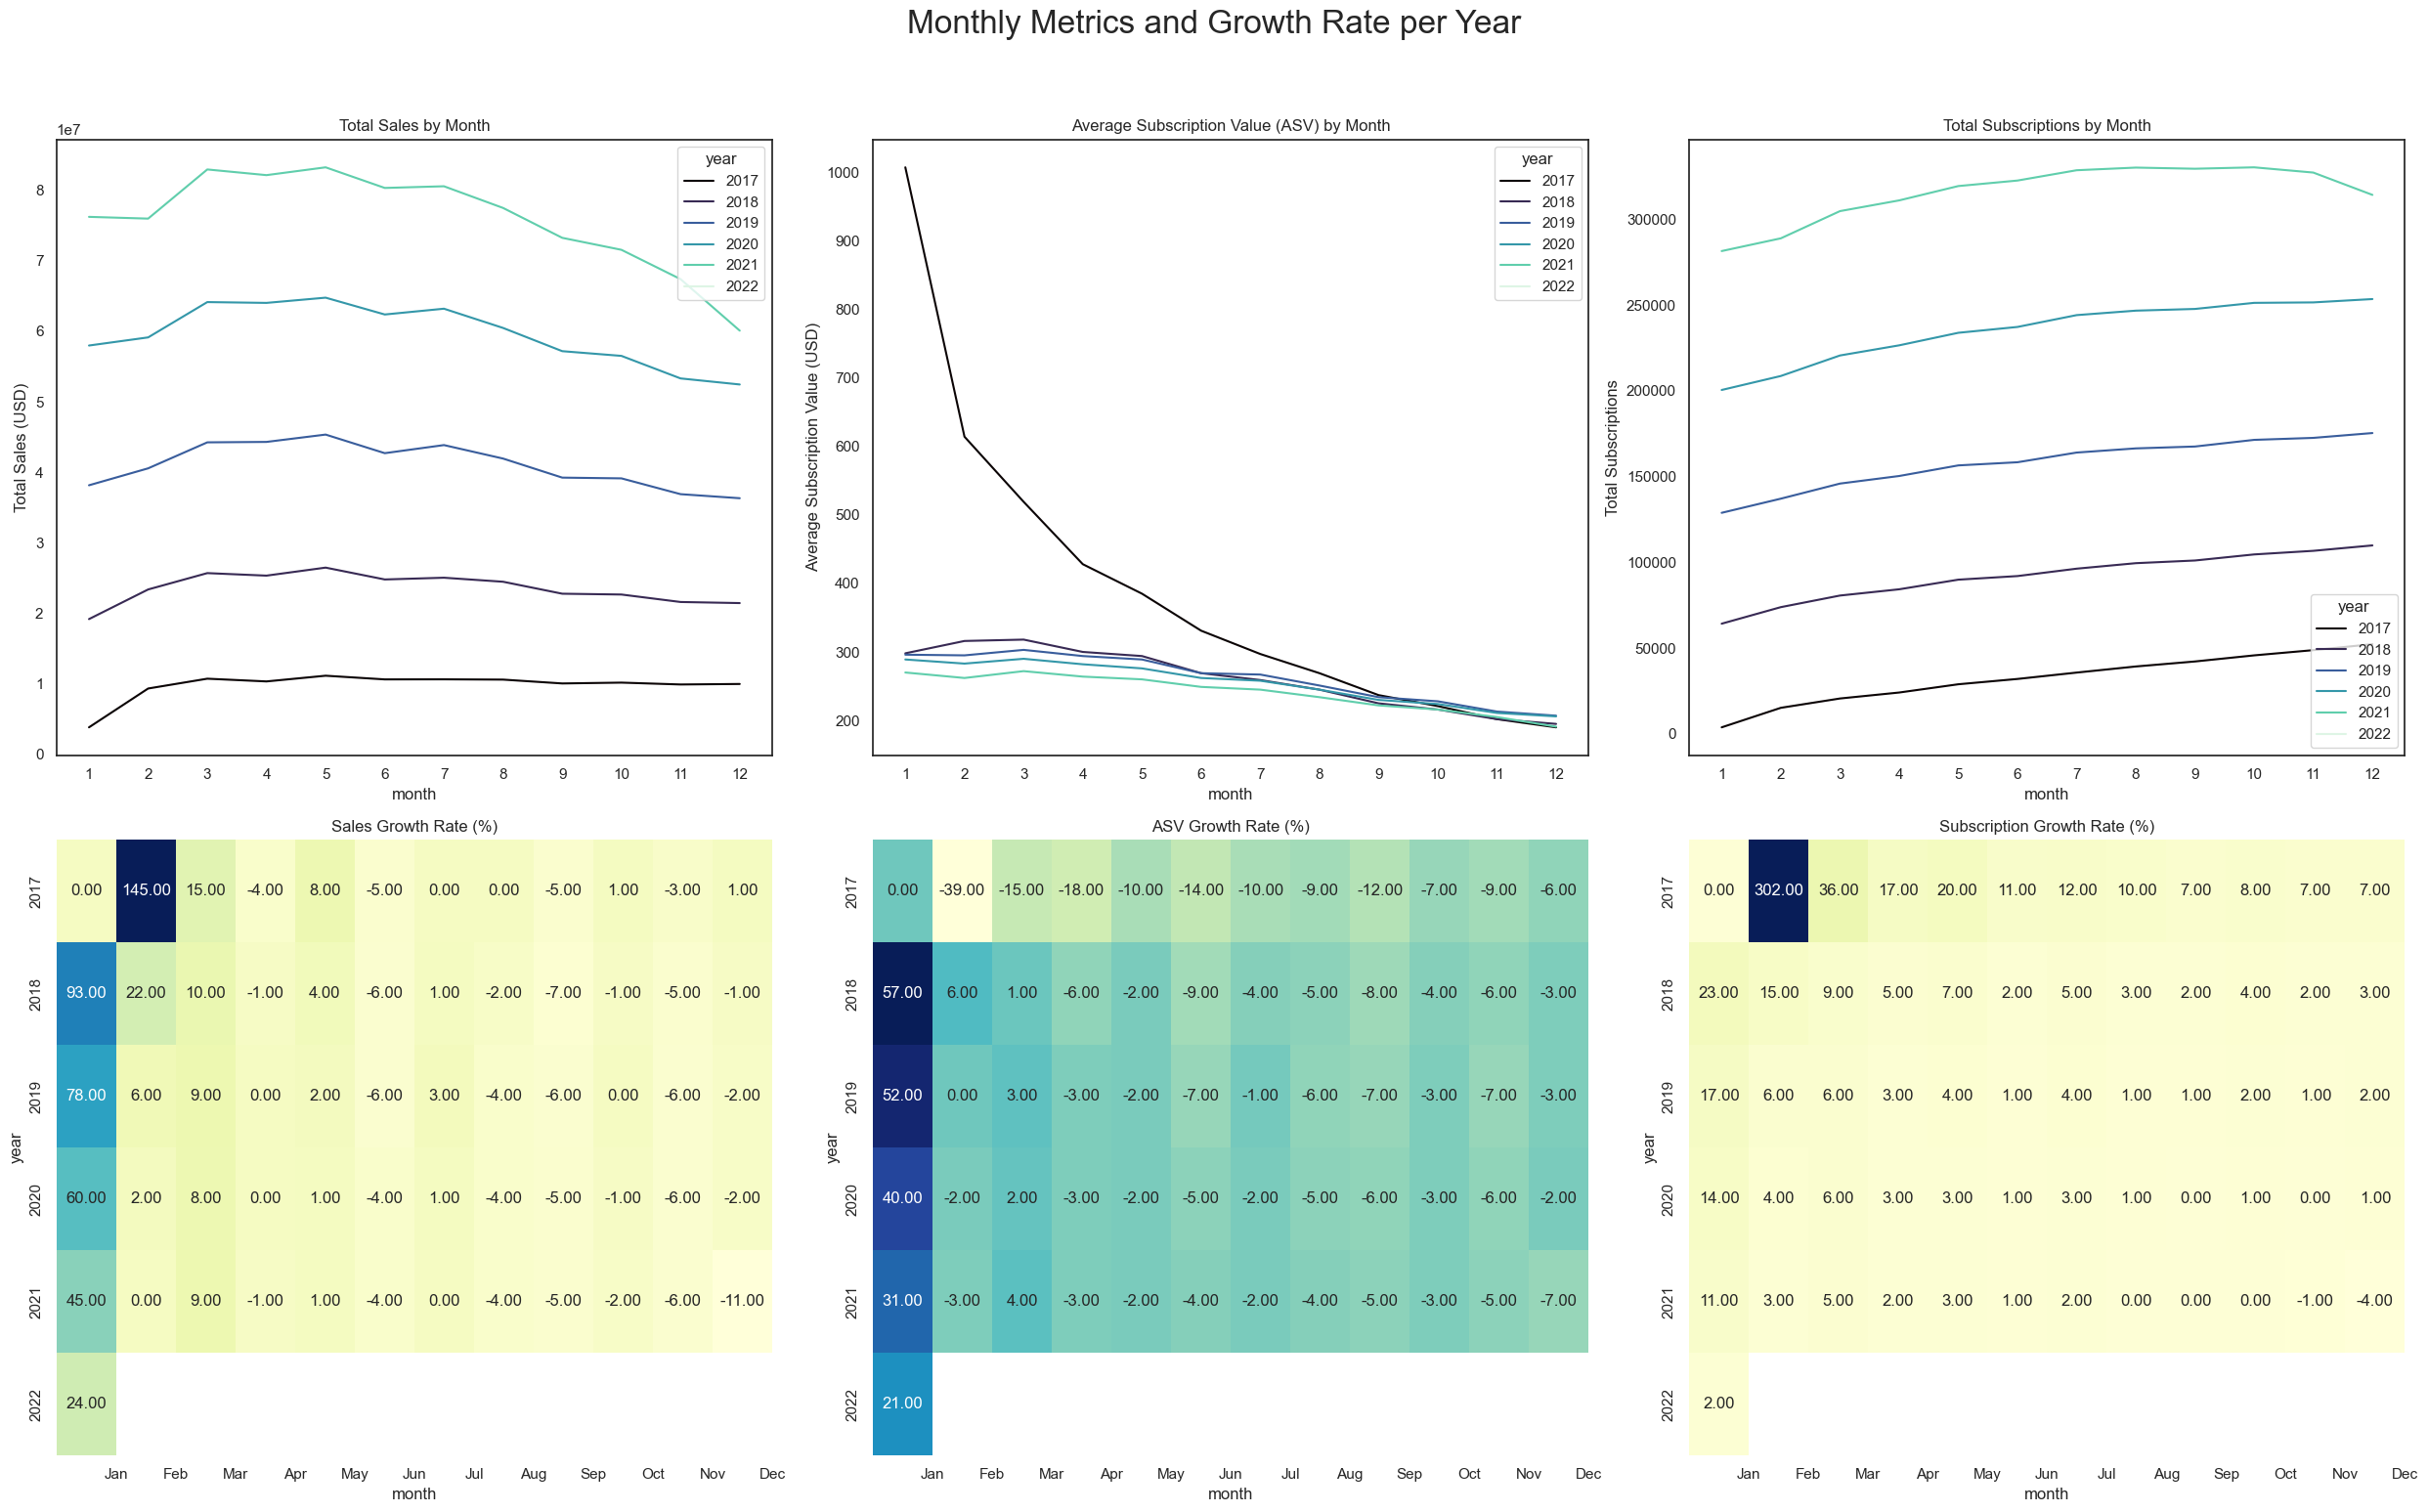

In [149]:
# plot monthly metrics
summary_by_month['year'] = summary_by_month.index.year
summary_by_month['month'] = summary_by_month.index.month

metrics = ["total_sales", "avg_subs_value", "total_subs"]
titles = ['Total Sales by Month', 'Average Subscription Value (ASV) by Month', 'Total Subscriptions by Month']
ylabels = ['Total Sales (USD)', 'Average Subscription Value (USD)', 'Total Subscriptions']
metrics_growth = ['sales_growth_rate', 'asv_growth_rate', 'subs_growth_rate']
titles_growth = ['Sales Growth Rate (%)', 'ASV Growth Rate (%)', 'Subscription Growth Rate (%)']
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig, axes = plt.subplots(2, 3, figsize=(25, 15))

# plot metrics linecharts
for i, (title, ylabel, metric) in enumerate(zip(titles, ylabels, metrics)):
    
    # Plot the lineplot for each metric
    sns.lineplot(x="month",y=metric, data=summary_by_month, hue="year", palette="mako", ax=axes[0,i] )   
    
    # set title, label and ticks    
    axes[0, i].set_title(title)
    axes[0, i].set_ylabel(ylabel)
    axes[0, i].set_xticks(range(1,13))

# plot growth rate heatmaps  
for i, (growth_metric, growth_title) in enumerate(zip(metrics_growth, titles_growth)):
    growth_table = summary_by_month.pivot_table(index="year", columns="month", values= growth_metric)
    
    # Plot the heatmap for each metric
    sns.heatmap(growth_table, cmap = 'YlGnBu',fmt='.2f', annot=True, ax=axes[1,i],cbar=False)
    
    # set titles, labels and ticks    
    axes[1, i].set_title(growth_title)
    axes[1, i].set_ylabel("year")
    axes[1, i].set_xticks(range(1,13))
    axes[1, i].set_xticklabels(months)

plt.suptitle("Monthly Metrics and Growth Rate per Year", y=1.03,fontsize=24)
plt.tight_layout()

---
### Yearly Summary
Analyze key yearly metrics, including total sales, average subscription value (ASV), and subscription growth rates. Understanding these monthly trends provides insights into seasonality, product impact, and business health over time.

---


In [71]:
# organize by year
monthly_df["year"] = monthly_df["months"].dt.year
annual_df["year"] = annual_df["years"].dt.year


# annual sales of subscriptions on a monthly plan
annual_sales_monthly_period = monthly_df.groupby("year").agg(total_sales = ("price", "sum"),
                                                           total_subs = ("customer_id","nunique"),
                                                           avg_sales = ("price", lambda x: int(x.mean()))
                                                          )
# annual sales of subscriptions on an annual plan
annual_sales_annual_period = annual_df.groupby("year").agg(total_sales = ("price", "sum"),
                                                           total_subs = ("customer_id","nunique"),
                                                           avg_sales = ("price", lambda x: int(x.mean()))
                                                            )
# combine annual sales from both periods
annual_sales = annual_sales_monthly_period + annual_sales_annual_period

# calculate the growth rate for each metric
annual_sales['sales_growth_rate'] = annual_sales['total_sales'].pct_change() * 100
annual_sales['subs_growth_rate'] = annual_sales['total_subs'].pct_change() * 100
annual_sales['asv_growth_rate'] = annual_sales['avg_sales'].pct_change() * 100

# fill NaN values with 0, round values, and convert values to integers
annual_sales = annual_sales.fillna(0).round(0).astype(int)

annual_sales

,total_sales,total_subs,avg_sales,sales_growth_rate,subs_growth_rate,asv_growth_rate
year,,,,,,
2017,117000780,159749,909,0,0,0
2018,282648885,346938,938,142,117,3
2019,492584625,568524,983,74,64,5
2020,715506405,796025,1012,45,40,3
2021,911277830,981062,1036,27,23,2
2022,74484720,321993,1092,-92,-67,5


## Product Performance Analysis

Assess the performance of individual products, focusing on key metrics such as total revenue, average subscription value (ASV), and order counts. This analysis identifies top-performing products and highlights areas for potential product improvement.

In [77]:
# annual summary on a monthly plan per product per subscription period
product_year_summary_monthly = monthly_df.groupby(["product","subscription_period", "year"]).agg(
                                                total_sales = ("price", "sum"),
                                                total_subs = ("customer_id","nunique"),
                                                avg_sales = ("price", lambda x: int(x.mean()))
                                                )

# annual summary on an annual plan per product per subscription period
product_year_summary_annual = annual_df.groupby(["product","subscription_period", "year"]).agg(
                                                total_sales = ("price", "sum"),
                                                total_subs = ("customer_id","nunique"),
                                                avg_sales = ("price", lambda x: int(x.mean()))
                                                )

# combine 
product_year_summary = pd.concat([product_year_summary_monthly, product_year_summary_annual])

# calculate the growth rate for each metric
product_year_summary['sales_growth_rate'] = product_year_summary['total_sales'].pct_change() * 100
product_year_summary['subs_growth_rate'] = product_year_summary['total_subs'].pct_change() * 100
product_year_summary['asv_growth_rate'] = product_year_summary['avg_sales'].pct_change() * 100

# fill NaN values with 0, round values, and convert values to integers
product_year_summary = product_year_summary.fillna(0).round(0).astype(int)

# inspect
product_year_summary

total_sales  total_subs  avg_sales  \
product    subscription_period year                                       
basic      monthly             2017     13273980       37897         60   
                               2018     40608060       77408         60   
                               2019     64891200      113547         60   
                               2020     84757680      144588         60   
                               2021     95608080      163598         60   
                               2022      7560420      126007         60   
business   monthly             2017      5116500        5341        125   
                               2018     17669625       16887        125   
                               2019     43330625       41429        125   
                               2020     97274125       91153        125   
                               2021    181868250      164580        125   
                               2022     17560000      140480        125   
enterprise monthly             2017      3486900        1942        300   
                               2018     10782900        3988        300   
                               2019     17538900        5885        300   
                               2020     23664300        7724        300   
                               2021     28846800        9166        300   
                               2022      2489700        8299        300   
basic      annual              2017     51122400       85204        600   
                               2018    102786000      171310        600   
                               2019    149458800      249098        600   
                               2020    188481600      314136        600   
                               2021    209088600      348481        600   
                               2022     12432600       20721        600   
business   annual              2017     30666000       25555       1200   
                               2018     83428800       69524       1200   
                               2019    176145600      146788       1200   
                               2020    267733200      223111       1200   
                               2021    332589600      277158       1200   
                               2022     30396000       25330       1200   
enterprise annual              2017     13335000        3810       3500   
                               2018     27373500        7821       3500   
                               2019     41219500       11777       3500   
                               2020     53595500       15313       3500   
                               2021     63276500       18079       3500   
                               2022      4046000        1156       3500   

                                     sales_growth_rate  subs_growth_rate  \
product    subscription_period year                                        
basic      monthly             2017                  0                 0   
                               2018                206               104   
                               2019                 60                47   
                               2020                 31                27   
                               2021                 13                13   
                               2022                -92               -23   
business   monthly             2017                -32               -96   
                               2018                245               216   
                               2019                145               145   
                               2020                124               120   
                               2021                 87                81   
                               2022                -90               -15   
enterprise monthly             2017                -80               -99   
                               2018           

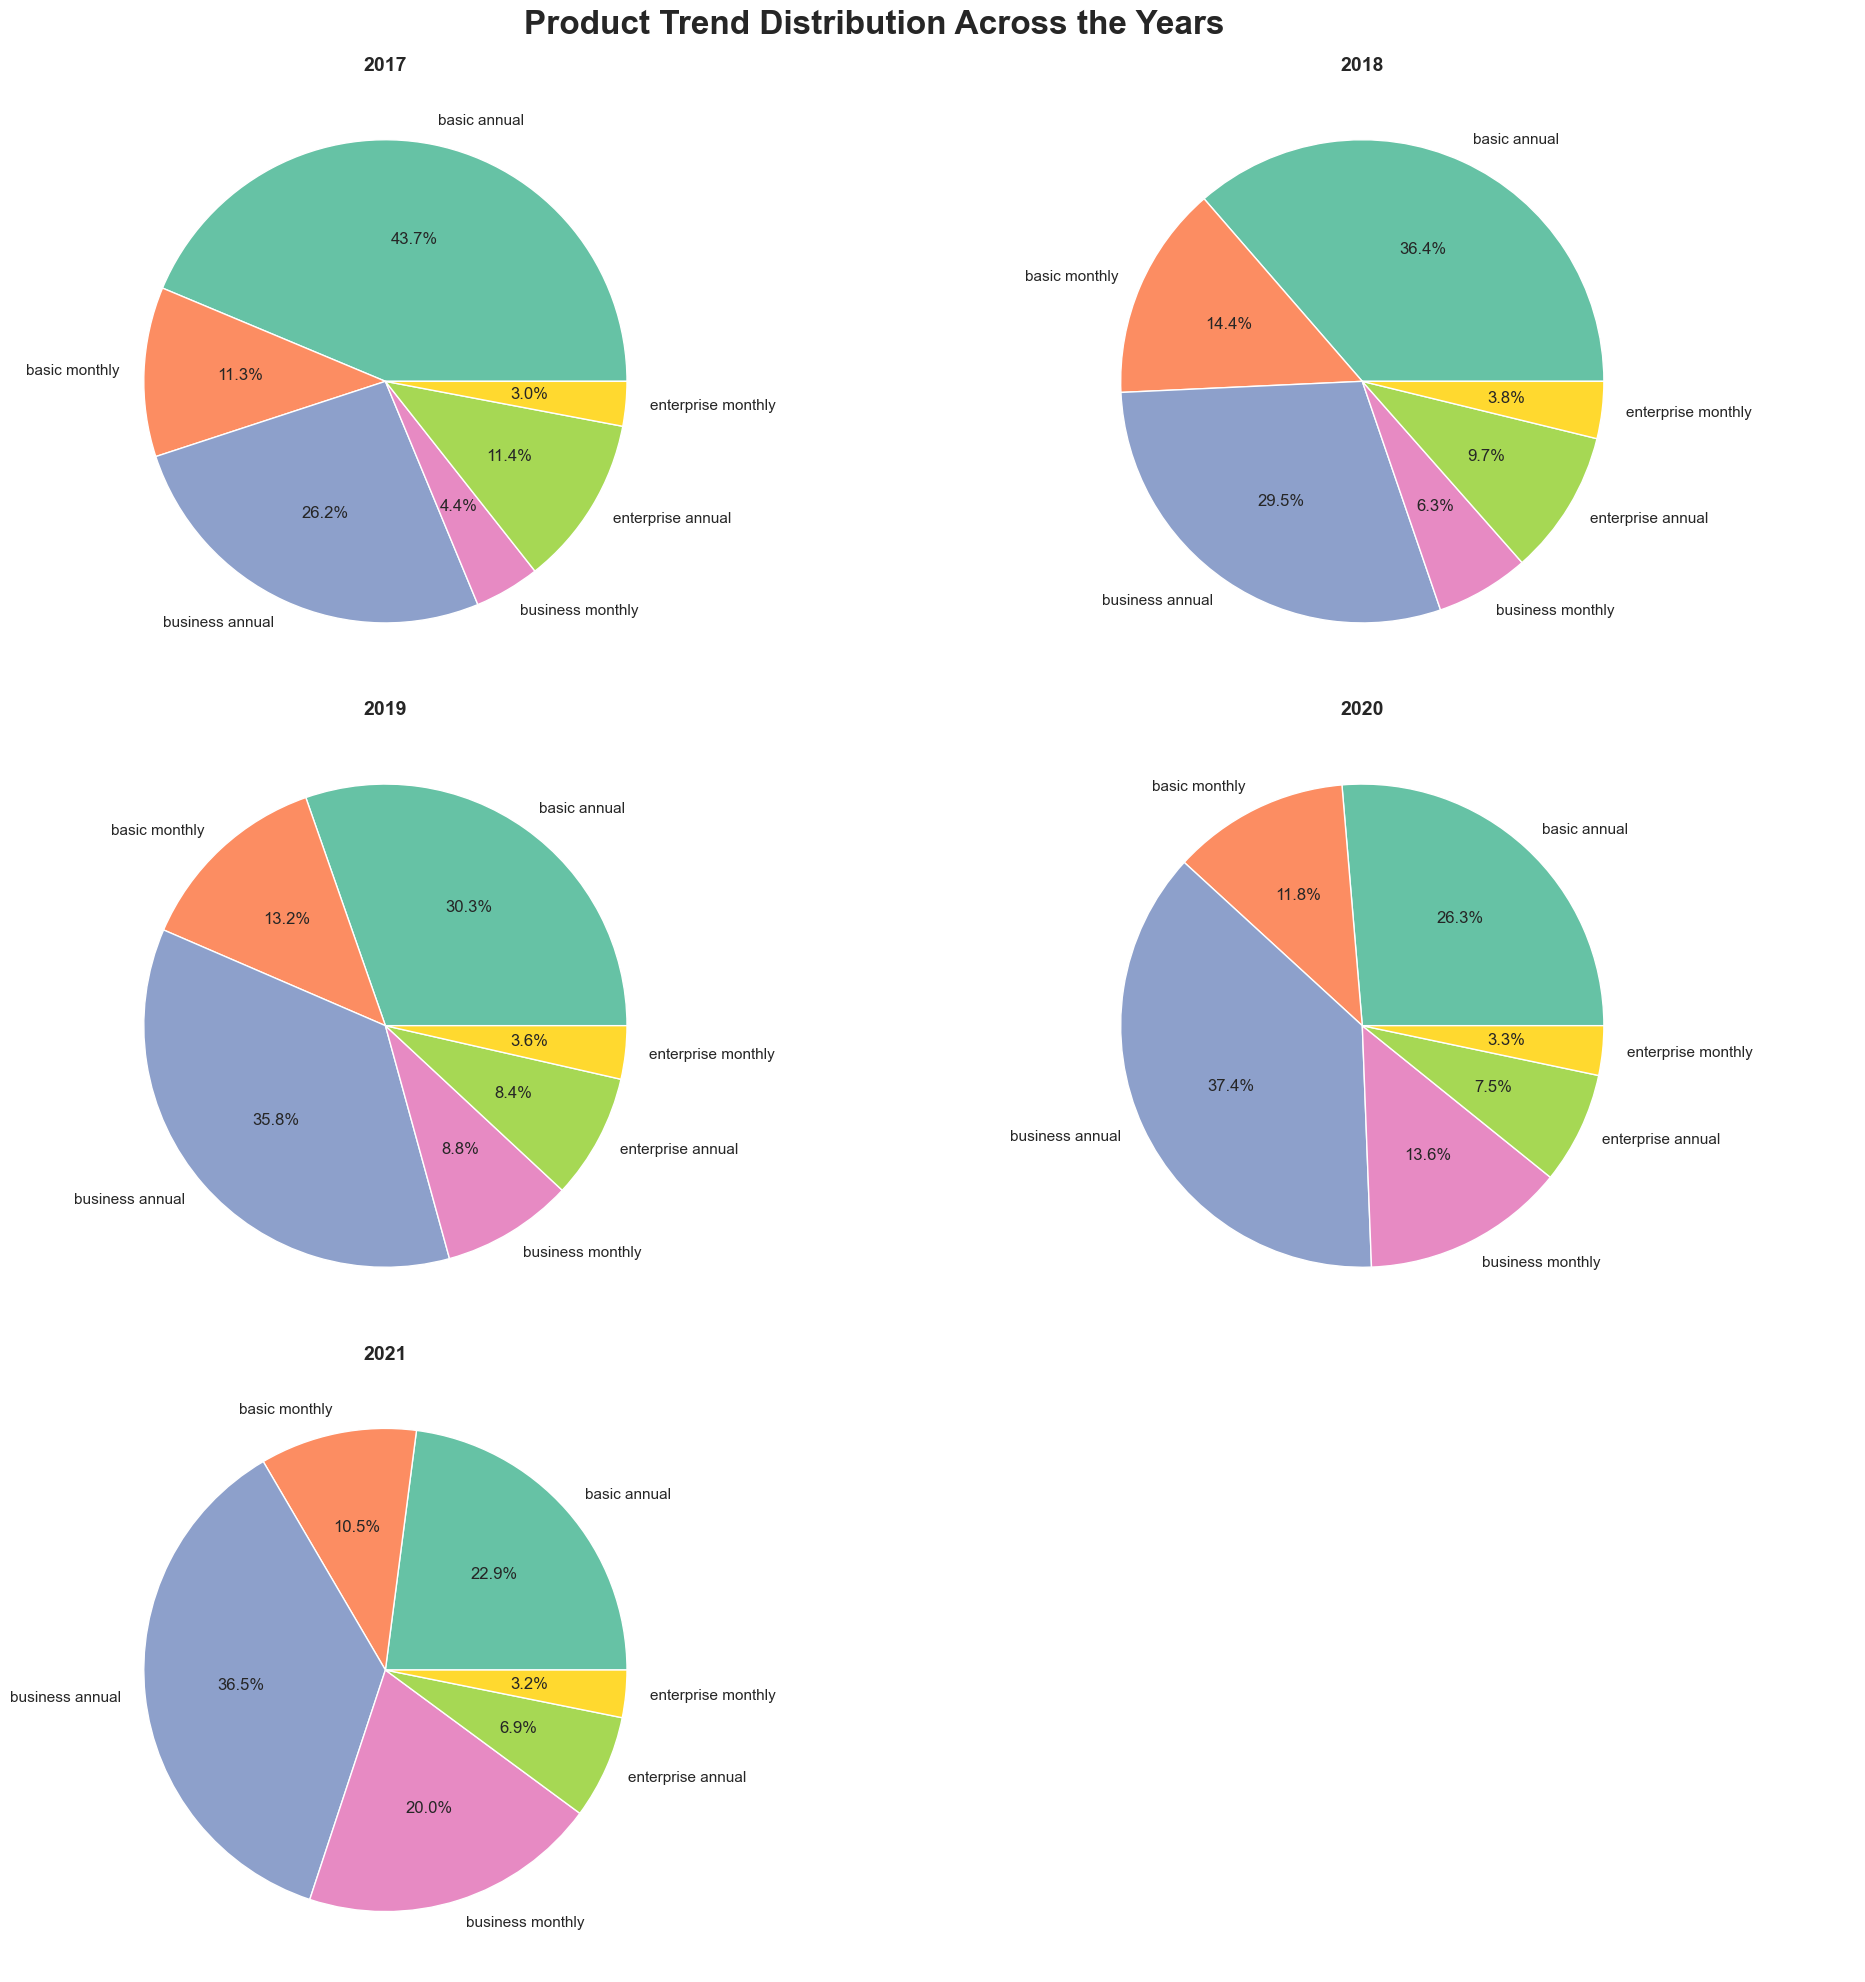

In [79]:
product_year_summary = product_year_summary.reset_index() 

# streamline the product names with respect to the subscriptions period
product_year_summary["product_name"] = product_year_summary["product"] + " " + product_year_summary["subscription_period"]
years = [2017, 2018, 2019, 2020, 2021]
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

for i, year in enumerate(years):
    data = product_year_summary[product_year_summary["year"]== year].groupby(["product_name"]).agg(
                                                                    sales=("total_sales", "sum")).reset_index()
#   obtain row and col indices
    row, col = divmod(i, 2)
    
#   plot the pie chart for each metric
    axes[row, col].pie(x=data["sales"], labels=data["product_name"], 
                       colors=sns.color_palette("Set2"),autopct='%1.1f%%')
#   set subtitle for subplots
    axes[row, col].set_title(f"{year}", fontsize=14, fontweight='bold')

# set title
plt.suptitle("Product Trend Distribution Across the Years", y=0.99,fontsize=24,fontweight="bold")

# remove blank subplot
axes[2, 1].axis('off') 
    
plt.tight_layout()


---

## Period Subscription Analysis
Analyze subscription period patterns across different years to identify period types performance variations and growth opportunities. This analysis provides insight into period and yearly trends, helping to inform targeted strategies for market expansion and tailored marketing efforts.



In [72]:
# annual summary on a monthly plan per subscription period
period_summary_monthly = monthly_df.groupby(["subscription_period", "year"]).agg(total_sales = ("price", "sum"),
                                            total_subs = ("customer_id","nunique"),
                                            avg_sales = ("price", lambda x: int(x.mean()))
                                            )
# monthly summary on a monthly plan per subscription period
period_summary_annual = annual_df.groupby(["subscription_period", "year"]).agg(total_sales = ("price", "sum"),
                                            total_subs = ("customer_id","nunique"),
                                            avg_sales = ("price", lambda x: int(x.mean()))
                                            )
# combine 
summary_period = pd.concat([period_summary_monthly, period_summary_annual])

# calculate the growth rate for each metric
summary_period['sales_growth_rate'] = summary_period['total_sales'].pct_change() * 100
summary_period['subs_growth_rate'] = summary_period['total_subs'].pct_change() * 100
summary_period['asv_growth_rate'] = summary_period['avg_sales'].pct_change() * 100

# fill NaN values with 0, round values, and convert values to integers
summary_period = summary_period.fillna(0).round(0).astype(int)

# inspect
summary_period

total_sales  total_subs  avg_sales  \
subscription_period year                                       
monthly             2017     21877380       45180         79   
                    2018     69060585       98283         80   
                    2019    125760725      160861         84   
                    2020    205696105      243465         90   
                    2021    306323130      337344         97   
                    2022     27610120      274786        100   
annual              2017     95123400      114569        830   
                    2018    213588300      248655        858   
                    2019    366823900      407663        899   
                    2020    509810300      552560        922   
                    2021    604954700      643718        939   
                    2022     46874600       47207        992   

                          sales_growth_rate  subs_growth_rate  asv_growth_rate  
subscription_period year                                                        
monthly             2017                  0                 0                0  
                    2018                216               118                1  
                    2019                 82                64                5  
                    2020                 64                51                7  
                    2021                 49                39                8  
                    2022                -91               -19                3  
annual              2017                245               -58              730  
                    2018                125               117                3  
                    2019                 72                64                5  
                    2020                 39                36                3  
                    2021                 19                16                2  
                    2022                -92               -93                6

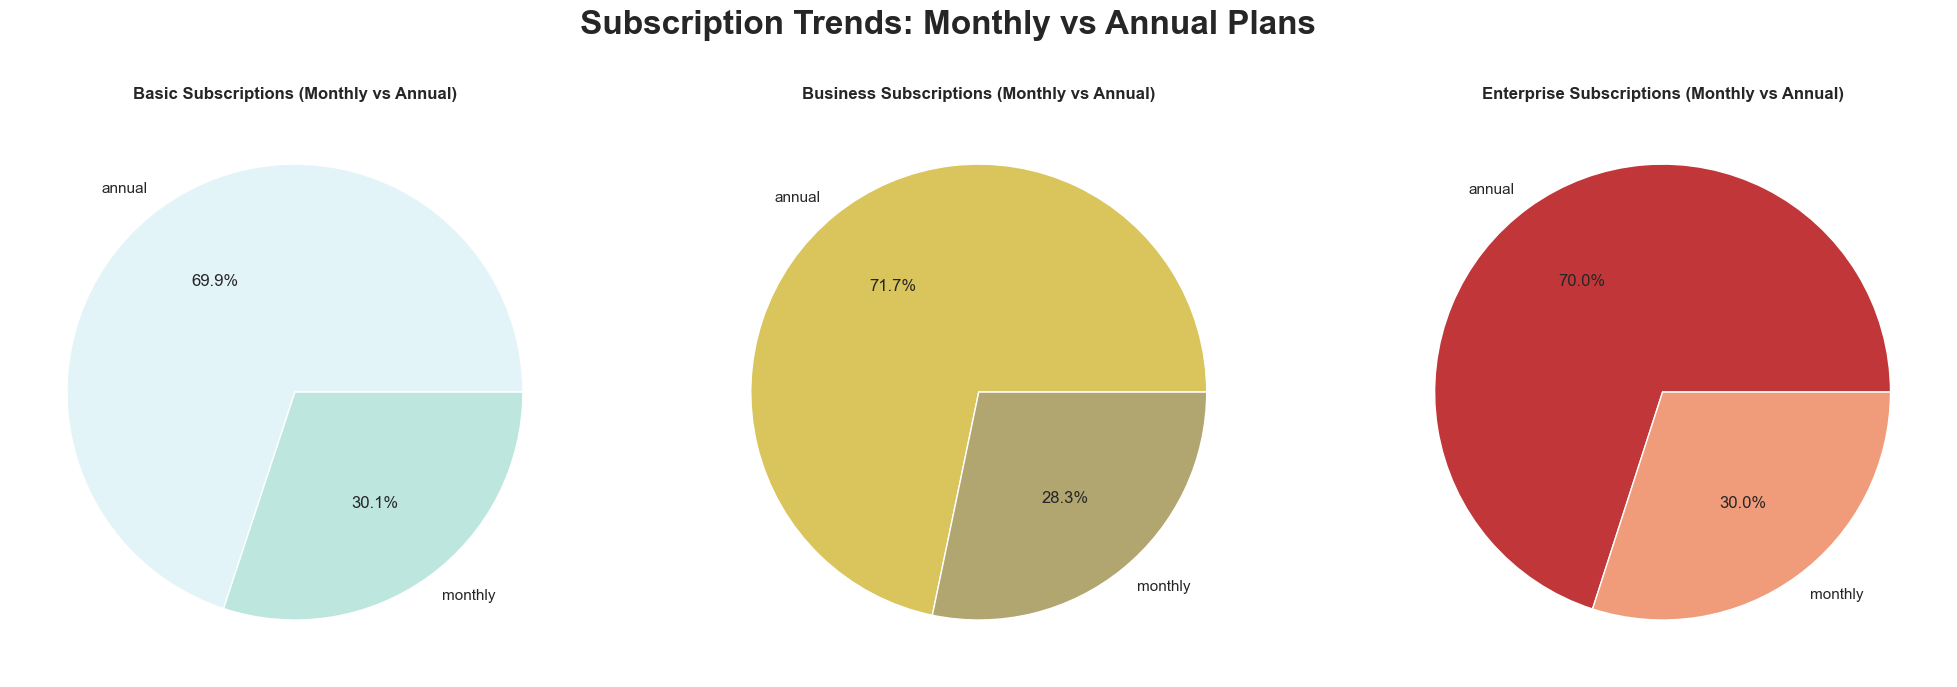

In [82]:
# summary_data = summary_product.reset_index()

titles = ["Basic Subscriptions (Monthly vs Annual)", "Business Subscriptions (Monthly vs Annual)", 
          "Enterprise Subscriptions (Monthly vs Annual)"]
colours = ["BuGn", "cividis_r", "RdGy"]
products = ["basic", "business", "enterprise"]
periods = ["monthly","annual"]

fig, axes = plt.subplots(1, 3, figsize=(25, 15))

for i, (product, colour, title) in enumerate(zip(products, colours, titles)):
    data = product_year_summary[product_year_summary["product"] == product].groupby(["subscription_period"]).agg(
        sales = ("total_sales", "sum")).reset_index()

#   plot the pie charts for each associated metric
    axes[i].pie(x=data["sales"], labels=data["subscription_period"], 
                colors=sns.color_palette(colour),autopct='%1.1f%%')
#   set suptitles for each subplot
    axes[i].set_title(title,fontweight="bold")

# set main title
plt.suptitle("Subscription Trends: Monthly vs Annual Plans", y=0.75,fontsize=24,fontweight="bold")
plt.show()

## Refund and Churn Analysis

This section analyzes the trends in refund and order rates over time to understand customer behavior and identify potential areas of improvement. By examining these metrics, we can assess the overall performance and customer satisfaction levels, which are critical for enhancing retention strategies.

In [85]:
# annual cancellation summary for those on an annual plan
cancel_monthly_subs = annual_df.groupby('year').agg(order_count = ("customer_id", "count"),
                                                     refund_count = ("ongoing_case", "sum"))

# annual cancellation summary for those on a monthly plan
cancel_annual_subs = monthly_df.groupby('year').agg(order_count = ("customer_id", "count"),
                                                      refund_count = ("ongoing_case", "sum"))

# combine
cancel_summary = cancel_annual_subs + cancel_monthly_subs

# add the refund rate metric
cancel_summary['refund_rate'] = (cancel_summary['refund_count'] / cancel_summary['order_count']) * 100

# fill NaN values with 0, round values, and convert values to integers
cancel_summary = cancel_summary.fillna(0).round(0).astype(int)

# inspect
cancel_summary

,order_count,refund_count,refund_rate
year,,,
2017,388357,233816,60
2018,1102756,695805,63
2019,1894291,1273369,67
2020,2822262,2092007,74
2021,3788288,3278759,87
2022,321993,314415,98


In [86]:
# product cancellation summary for those on an annual plan
cancel_monthly_product = annual_df.groupby('product').agg(order_count = ("customer_id", "count"),
                                                     refund_count = ("ongoing_case", "sum"))

# product cancellation summary for those on a monthly plan
cancel_annual_product = monthly_df.groupby('product').agg(order_count = ("customer_id", "count"),
                                                      refund_count = ("ongoing_case", "sum"))

# combine
cancel_product = cancel_annual_product + cancel_monthly_product

# add the refund rate metric
cancel_product['refund_rate'] = (cancel_product['refund_count'] / cancel_product['order_count']) * 100

# fill NaN values with 0, round values, and convert values to integers
cancel_product = cancel_product.fillna(0).round(0).astype(int)

# inspect
cancel_product

,order_count,refund_count,refund_rate
product,,,
basic,6300607,4854849,77
business,3670019,2970172,81
enterprise,347321,63150,18


In [87]:
# annual summary on a monthly plan per product per subscription period
product_summary_monthly = monthly_df.groupby(["product","subscription_period"]).agg(
                                            total_sales = ("price", "sum"),
                                            total_subs = ("customer_id","nunique"),
                                            avg_sales = ("price", lambda x: int(x.mean()))
                                            )

# annual summary on an annual plan per product per subscription period
product_summary_annual = annual_df.groupby(["product","subscription_period"]).agg(
                                            total_sales = ("price", "sum"),
                                            total_subs = ("customer_id","nunique"),
                                            avg_sales = ("price", lambda x: int(x.mean()))
                                            )

# combine 
summary_product = pd.concat([product_summary_monthly, product_summary_annual])

# calculate the growth rate for each metric
summary_product['sales_growth_rate'] = summary_product['total_sales'].pct_change() * 100
summary_product['subs_growth_rate'] = summary_product['total_subs'].pct_change() * 100
summary_product['asv_growth_rate'] = summary_product['avg_sales'].pct_change() * 100

# fill NaN values with 0, round values, and convert values to integers
summary_product = summary_product.fillna(0).round(0).astype(int)

# inspect
summary_product

,,total_sales,total_subs,avg_sales,sales_growth_rate,subs_growth_rate,asv_growth_rate
product,subscription_period,,,,,,
basic,monthly,306699420,200000,60,0,0,0
business,monthly,362819125,183283,125,18,-8,108
enterprise,monthly,86809500,10000,300,-76,-95,140
basic,annual,713370000,450000,600,722,4400,100
business,annual,920959200,325649,1200,29,-28,100
enterprise,annual,202846000,20000,3500,-78,-94,192


---
### Conclusion 
See Readme file for a more detailed conclusion

---